In [1]:
import numpy as np
from numpy import linalg as LA
import tensorflow

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import os
import h5py
import matplotlib.pyplot as plt
from scipy import spatial
import matplotlib.image as mpimg
from skimage import io, img_as_ubyte

In [4]:
input_shape = (128, 128, 3)

In [7]:
model = VGG19(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling='max', include_top = False )

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model.predict(np.zeros((1, 128, 128, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[2.24277258e-01, 0.00000000e+00, 0.00000000e+00, 2.82934844e-01,
        8.91445100e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.62895483e-01, 0.00000000e+00, 0.00000000e+00, 8.30889821e-01,
        0.00000000e+00, 4.93129909e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.08670020e-02,
        5.15330583e-02, 0.00000000e+00, 8.17101777e-01, 0.00000000e+00,
        1.96546450e-01, 0.00000000e+00, 6.26079440e-01, 0.00000000e+00,
        4.17739630e-01, 0.00000000e+00, 8.88199210e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.70369565e-01, 0.00000000e+00,
        0.00000000e+00, 7.58043900e-02, 0.00000000e+00, 4.13850397e-02,
        0.00000000e+00, 6.12421989e-01, 0.00000000e+00, 0.00000000e+00,
        6.10419810e-02, 0.00000000e+00, 5.71279645e-01, 1.505772

In [9]:
def vgg19_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [12]:
image_path = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images/"

In [13]:
image_list = [os.path.join(image_path, f) for f in os.listdir(image_path)]
features = []
names = []

for img in os.listdir(image_path):
    X = vgg19_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

In [16]:
vgg19_features = "VGG19Features.h5"
h5f = h5py.File(vgg19_features, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [19]:
open_h5f = h5py.File("VGG16Features.h5", "r")
features = open_h5f['dataset_1'][:]
image_name = open_h5f['dataset_2'][:]
open_h5f.close()

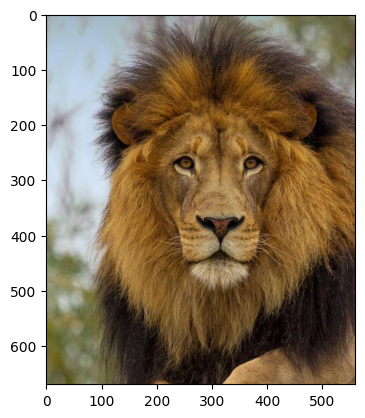

In [22]:
query_image = "/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images/2d670c088a.jpg"
plt.imshow(io.imread(query_image))
plt.show()

In [23]:
X = vgg19_extract_feature(query_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [27]:
scores = []
for i in range(features.shape[0]):
    score = 1 - spatial.distance.cosine(X, features[i])
    scores.append(score)
scores = np.array(scores)
rank_id = np.argsort(scores)[::-1]
rank_score = scores[rank_id]

In [42]:
n = 3
lists = [image_name[index] for i, index in enumerate(rank_id[0:n])]
print("Top %d images in order are: " %n, lists)

Top 3 images in order are:  [b'2d670c088a.jpg', b'92c30c59f8.jpg', b'0a928b34b5.jpg']


In [43]:
image_directory = '/Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images'

File not found: /Users/sudipkhadka/Desktop/Data-Science-ML-Engineering/Image-Reterival-System/images/0a928b34b5.jpg


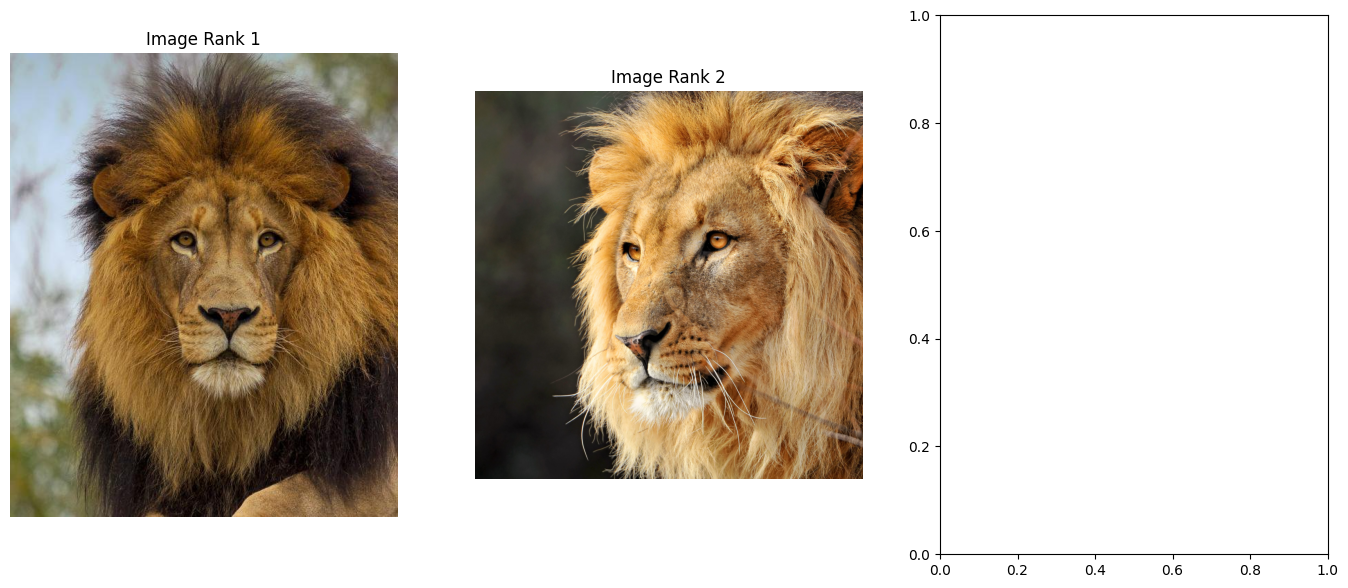

In [44]:
lists = [os.path.join(image_directory, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(image_directory, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

num_images = len(lists)
fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
for i, image_path in enumerate(lists):
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)  
        axes[i].imshow(img)  
        axes[i].axis('off')  
        axes[i].set_title(f"Image Rank {i+1}")
    else:
        print(f"File not found: {image_path}") 
plt.show()